# Dataset creation

This notebook helps you load/generate 5 different datasets. If you just want to generate the datasets, press "Run all" in your jupyter notebook, wait a minute, and check your new directory `datasets`.

In [4]:
##Basic helper functions for this notebook. Run this first.
import os
import pickle as pkl

def create_folder(name):
    if not os.path.exists(name):
        os.makedirs(name)


datasets_path = 'datasets'
create_folder(datasets_path)

## IRIS

For IRIS we can use the dataset offered throught `scikit-learn`.      

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names

df =  pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                     columns= feature_names + ['label'])

display(df.head())

df.to_csv(datasets_path + '/iris.csv')



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Rain Dataset

This is a dataset from kaggle, see here https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The repository should contain a `rain.pq` file which is a highly compressed version of the dataset. The code below turns that file into a human readable .csv

In [6]:
df = pd.read_parquet('datasets/rain.pq')
df.to_csv('datasets/rain.csv')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

# Ad Hoc Dataset

This dataset is taken from here: https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.datasets.ad_hoc_data.html

Can be perfectly solved using QSVM, as seen here: https://qiskit.org/documentation/machine-learning/tutorials/03_quantum_kernel.html

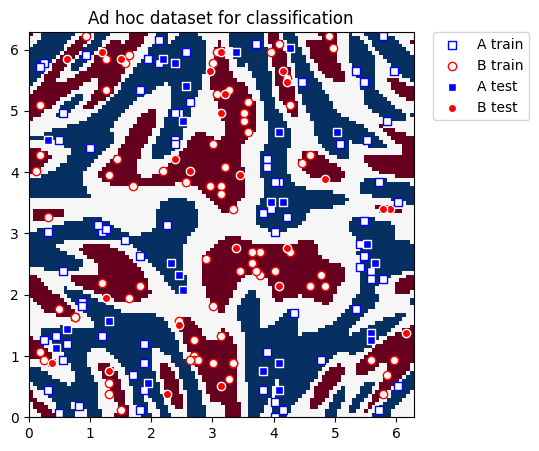

None

,feature_1,feature_2,label
0,4.021239,0.000000,0.0
1,5.780530,2.261947,0.0
2,0.251327,1.256637,0.0
3,2.450442,4.963716,0.0
4,5.843362,4.838053,0.0


In [12]:
from qiskit_machine_learning.datasets import ad_hoc_data

#sample size 100
adhoc_dimension = 2 #number of qubits (dimension of the feature space, must be 2 or 3!, read the links)
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=75,
    test_size=25,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")
display(plt.show())


df =  pd.DataFrame(data=np.concatenate((train_features, np.array([train_labels]).T), axis=1),
                     columns= ['feature_1','feature_2','label'])
display(df.head())
df.to_csv(datasets_path+'/adhoc_100.csv')

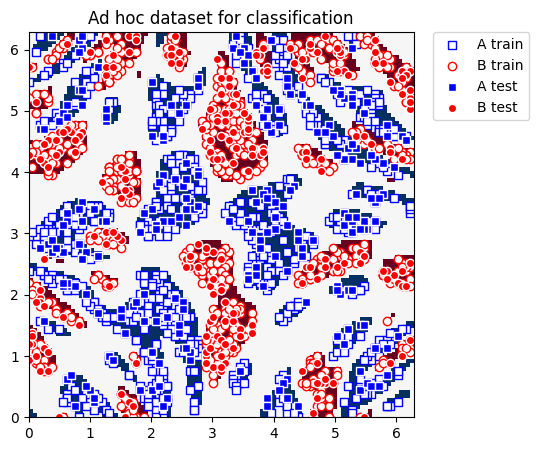

None

,feature_1,feature_2,label
0,0.314159,1.445133,0.0
1,4.209734,0.188496,0.0
2,2.324779,1.507964,0.0
3,2.073451,5.089380,0.0
4,2.387610,1.319469,0.0


In [13]:
from qiskit_machine_learning.datasets import ad_hoc_data

#sample size 1000
adhoc_dimension = 2 #number of qubits (dimension of the feature space, must be 2 or 3!, read the links)
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=750,
    test_size=250,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")
display(plt.show())


df =  pd.DataFrame(data=np.concatenate((train_features, np.array([train_labels]).T), axis=1),
                     columns= ['feature_1','feature_2','label'])
display(df.head())
df.to_csv(datasets_path+'/adhoc_1000.csv')

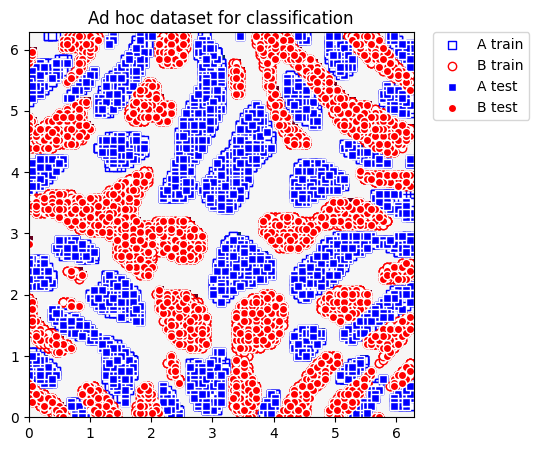

None

,feature_1,feature_2,label
0,5.026548,5.969026,0.0
1,3.267256,3.958407,0.0
2,5.466371,2.953097,0.0
3,6.094690,5.152212,0.0
4,3.392920,2.136283,0.0


In [14]:
from qiskit_machine_learning.datasets import ad_hoc_data

#sample size 10000
adhoc_dimension = 2 #number of qubits (dimension of the feature space, must be 2 or 3!, read the links)
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=7500,
    test_size=2500,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

plt.scatter(
    train_features[np.where(train_labels[:] == 0), 0],
    train_features[np.where(train_labels[:] == 0), 1],
    marker="s",
    facecolors="w",
    edgecolors="b",
    label="A train",
)
plt.scatter(
    train_features[np.where(train_labels[:] == 1), 0],
    train_features[np.where(train_labels[:] == 1), 1],
    marker="o",
    facecolors="w",
    edgecolors="r",
    label="B train",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 0), 0],
    test_features[np.where(test_labels[:] == 0), 1],
    marker="s",
    facecolors="b",
    edgecolors="w",
    label="A test",
)
plt.scatter(
    test_features[np.where(test_labels[:] == 1), 0],
    test_features[np.where(test_labels[:] == 1), 1],
    marker="o",
    facecolors="r",
    edgecolors="w",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for classification")
display(plt.show())


df =  pd.DataFrame(data=np.concatenate((train_features, np.array([train_labels]).T), axis=1),
                     columns= ['feature_1','feature_2','label'])
display(df.head())
df.to_csv(datasets_path+'/adhoc_10000.csv')

# Vlds - Very Last Dataset

This dataset is built using `scikit` `Datasets.make_multilabel_classification`.

In [8]:
from sklearn import datasets

# sample size 100
X, Y =datasets.make_multilabel_classification(n_samples=100, n_features=4 ,n_classes=1)
df =  pd.DataFrame(data=np.concatenate((X, np.array([Y.flatten()]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])
display(df.head())
df.to_csv(datasets_path+'/vlds_100.csv')

#sample size 1000
X, Y =datasets.make_multilabel_classification(n_samples=1000, n_features=4 ,n_classes=1)
df =  pd.DataFrame(data=np.concatenate((X, np.array([Y.flatten()]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])
display(df.head())
df.to_csv(datasets_path+'/vlds_1000.csv')

#sample size 10000
X, Y =datasets.make_multilabel_classification(n_samples=10000, n_features=4 ,n_classes=1)
df =  pd.DataFrame(data=np.concatenate((X, np.array([Y.flatten()]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'label'])
display(df.head())
df.to_csv(datasets_path+'/vlds_10000.csv')

,feature_1,feature_2,feature_3,feature_4,label
0,13.0,9.0,12.0,10.0,0.0
1,10.0,13.0,16.0,17.0,0.0
2,16.0,3.0,29.0,5.0,1.0
3,13.0,7.0,35.0,14.0,1.0
4,11.0,7.0,23.0,8.0,1.0


,feature_1,feature_2,feature_3,feature_4,label
0,17.0,8.0,20.0,12.0,1.0
1,17.0,2.0,24.0,12.0,1.0
2,13.0,10.0,18.0,8.0,0.0
3,16.0,9.0,19.0,13.0,1.0
4,18.0,6.0,17.0,17.0,1.0


,feature_1,feature_2,feature_3,feature_4,label
0,16.0,10.0,10.0,12.0,0.0
1,13.0,4.0,18.0,22.0,1.0
2,13.0,5.0,12.0,29.0,1.0
3,8.0,5.0,19.0,29.0,1.0
4,9.0,6.0,16.0,30.0,1.0


# Custom Dataset  

In [10]:
from numpy.random import default_rng


'''
Custom data set generator.
Points inside of the square.
Points ouside of the squre.
center - centers of two concetric squres.
Two feature data point.
numberPoints - number of generated points
x is choosen, y deppending on x has two cases.
'''
def custom_dataset_generator(numberPoints,center,innerR,outerR,custom_fraction_inside):
    line1 = lambda x: (x+center[1]-center[0])
    line2 = lambda x: (-x+center[1]+center[0])
    innerX = [center[0]-innerR,center[0]+innerR]
    innerY = [center[1]-innerR,center[1]+innerR]
    
    outerYTop = [center[1]+innerR,center[1]+outerR] 
    outerYBot = [center[1]-outerR,center[1]-innerR]
    outerX = [center[0]-outerR,center[0]+outerR]
    outerY = [center[1]-outerR,center[1]+outerR]
    
    x = np.array([])
    y = np.array([])
    l = np.array([])
    
    rng = default_rng()

    nPointInside = numberPoints*custom_fraction_inside
    nPointOutside = numberPoints - nPointInside
    print(y)
    for i in range(int(nPointInside)):
        rn = rng.uniform(1,4) # by setting 0, will include center square
        l = np.append(l,0)
        if int(rn)== 0:#put in center
            x_rn = rng.uniform(innerX[0],innerX[1])
            x = np.append(x,x_rn)
            y = np.append(y,rng.uniform(innerY[0],innerY[1]))
        elif int(rn) == 1:#put on the first line
            x_rn = rng.uniform(outerX[0],outerX[1])
            x = np.append(x,x_rn)
            y = np.append(y,line1(x_rn))
        else:#put on the second line
            x_rn = rng.uniform(outerX[0],outerX[1])
            x = np.append(x,x_rn)
            y = np.append(y,line2(x_rn))
        
    for i in range(int(nPointOutside)):
        x = np.append(x,rng.uniform(outerX[0],outerX[1]))
        if( x[-1] < innerX[1] and x[-1] > innerX[0]):
            if rng.uniform() > 0.5:
                y = np.append(y,rng.uniform(outerYTop[0],outerYTop[1]))
            else:
                y = np.append(y,rng.uniform(outerYBot[0],outerYBot[1]))
        else:
            y = np.append(y,rng.uniform(outerY[0],outerY[1]))
        l = np.append(l,1)
    return np.stack((x,y),axis=1),np.uint(l)

In [11]:
#sample size 100
X, Y = custom_dataset_generator(100,(3,3),0.1,0.5, 0.3)
df = pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'label'])

display(df.head())
df.to_csv(datasets_path + '/custom_dataset_100.csv')

#sample size 1000
X, Y = custom_dataset_generator(1000,(3,3),0.1,0.5, 0.3)
df = pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'label'])

display(df.head())
df.to_csv(datasets_path + '/custom_dataset_1000.csv')

#sample size 10000
X, Y = custom_dataset_generator(10000,(3,3),0.1,0.5, 0.3)
df = pd.DataFrame(data=np.concatenate((X, np.array([Y]).T), axis=1),
                     columns= ['feature_1', 'feature_2', 'label'])

display(df.head())
df.to_csv(datasets_path + '/custom_dataset_10000.csv')

[]


,feature_1,feature_2,label
0,2.812392,3.187608,0.0
1,2.898030,3.101970,0.0
2,2.527121,3.472879,0.0
3,3.073828,2.926172,0.0
4,3.364349,2.635651,0.0


[]


,feature_1,feature_2,label
0,3.387893,3.387893,0.0
1,2.584455,3.415545,0.0
2,2.861957,2.861957,0.0
3,3.018950,2.981050,0.0
4,2.648249,2.648249,0.0


[]


,feature_1,feature_2,label
0,3.491666,2.508334,0.0
1,3.096057,2.903943,0.0
2,2.600477,3.399523,0.0
3,2.995727,3.004273,0.0
4,3.192193,3.192193,0.0
